# 外れ値の扱い

In [1]:
しばしば、外れ値は分析の邪魔になる。少数の外れ値が、結果全体をゆがませるのは望ましくない。ここでは、大富豪を混ぜた収入分布のデータを作ろう。

最初に、収入分布が正規分布に従う場合（外れ値がない場合）を考える。

正規分布のパラメータは、平均=27000、標準偏差=15000、サイズ=10000であるとする。

正規分布を生成するには、numpy.random.normalを用いる。

生成した正規分布をヒストグラムの形でグラフ表示するしよう。


SyntaxError: invalid character in identifier (<ipython-input-1-80c8054a6afe>, line 1)

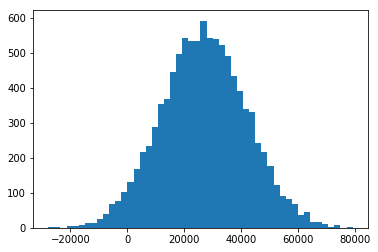

In [2]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
#incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

正規分布を確認できたであろうか？

次に、この正規分布（リスト形式）に１個の外れ値を追加して、ヒストグラムを作成し、画面に表示しよう。

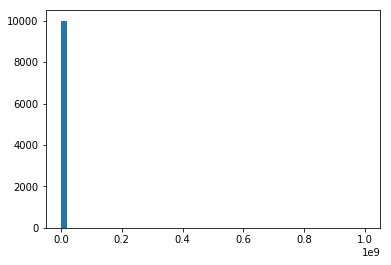

In [2]:
# %matplotlib inline
# import numpy as np

# incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

# import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

これを見ても何もわかりませんね。一人の大富豪が、ヒストグラム上においてその他の人々を一本の線に押し込めてしまった。その上、収入の平均までおかしくなった。

incomesの平均値を求めなさい。

In [3]:
incomes.mean()

127053.85723591592

外れ値がなぜ発生し、どこから来るのか理解するのは大事なことである。そして、これを除去してもいいのか解析の目的と照らし合わせて考える必要がある。もし、典型的な市民を解析し理解したいのであれば、大富豪を除去していもいいように思える。

実は、大富豪を除去するよりも良い方法がある。データセットの中央値から標準偏差*2より離れた値を除去する方法である。

中央値は、numpy.medianによって求めることができる。

標準偏差は、numpy.stdによって求めることができる。

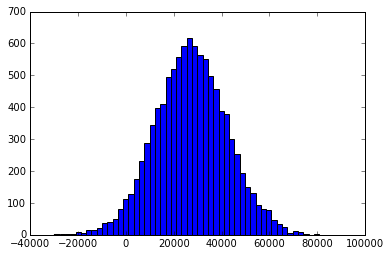

In [3]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

データが改善されたことがわかる。平均値も、意味をなすようになった。平均値を求めよう。

In [5]:
np.mean(filtered)

27161.222812567459

## アクティビティ

単一の外れ値の代わりに、いくつかのランダムな外れ値をデータに加えてみよう。また、外れ値の検出に、標準偏差に様々な数をかけた値を使ってみよう。そして、それらが結果にどのような影響を及ぼすのか確かめてみよう。

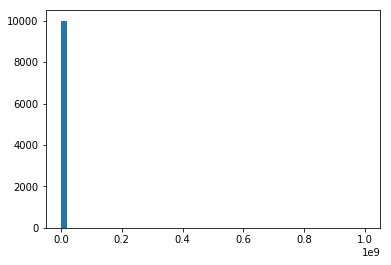

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])
incomes = np.append(incomes, [1000000000])
incomes = np.append(incomes, [1000000000])


plt.hist(incomes, 50)
plt.show()

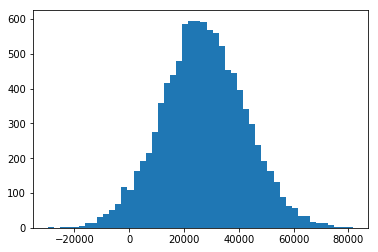

In [8]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

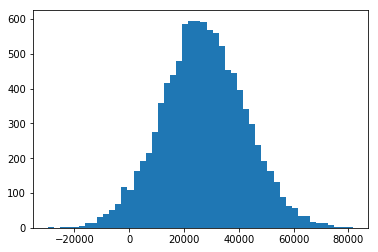

In [12]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 20 * s < e < u + 20 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

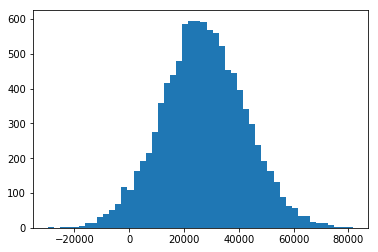

In [14]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 1 * s < e < u + 1 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

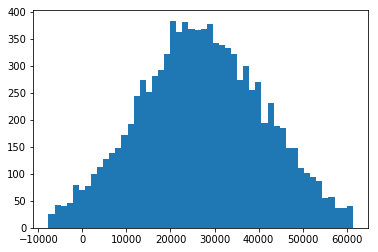

In [21]:
%matplotlib inline

def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 0.002 * s < e < u + 0.002 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()